## Data

In [3]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
%matplotlib inline

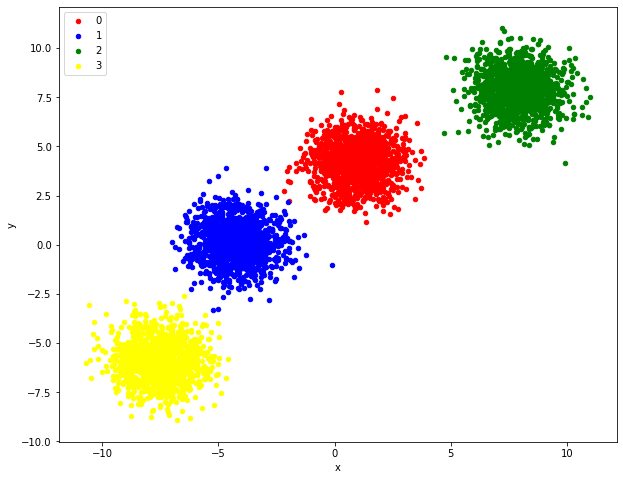

In [4]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

pyplot.rcParams["figure.figsize"] = (10,8)


# generate 2d classification dataset
X, y = make_blobs(n_samples=5000, centers=4, n_features=2, random_state=3)

# X = X.astype(int)


# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green', 3:'yellow'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# pyplot.show()

4000


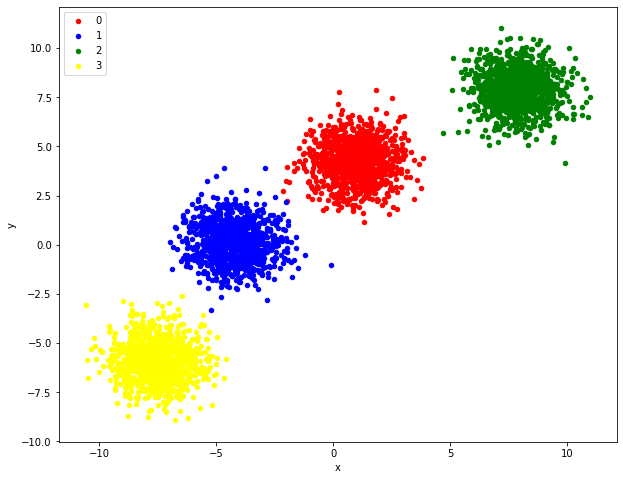

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train))
colors = {0:'red', 1:'blue', 2:'green', 3:'yellow'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# pyplot.show()

## Spherical Gaussian 
The likelihood for each point is:
![alt text](sg.png "Title")

Assuming there are exactly k clusters 
![alt text](sg2.png "Title")

![alt text](sg3.png "Title")

## Model Parameters
![alt text](mp.png "Title")

## Maximum Likelihood Objective 

An indicator that tells us whether x(t) should be assigned to cluster i:
![alt text](deli.png "Title")


Maximum Likelihood Objective
![alt text](obj.png "Title")

In [7]:
def del_i(point, cluster):
    if point in cluster:
        return 1
    else:
        return 0

## Algorithm

### Model Parameter Estimation
![alt.text](est.png "Title")

In [114]:
import math
def get_all_n(clusters):
    ns = []
    for cluster in clusters:
        ns.append(len(cluster))
    return ns

def get_all_p(nis, n):
    pi = []
    for ni in nis:
        pi.append(ni/n)
    return pi

def get_all_mean(clusters):
    mean = []
#     print(clusters[1])
    
    for cluster in clusters:
        total = np.zeros(len(cluster[0]))
        for point in cluster:
            total += point
        mean.append(total/len(cluster))
    return mean

def get_all_variance(clusters, means):
    var = []
    
    for index, cluster in enumerate(clusters):
#         print(len(cluster[0]))
        total = 0
        ni = len(cluster)
        d = len(cluster[0])
        for point in cluster:
            for i, dim in enumerate(point):
                
                total += math.pow((dim-means[index][i]),2)
        
        var.append(total/(ni*d))
    return var

In [115]:
def learning(X_train, y_train, c_no):
    n = len(X_train)
    #create clusters
    clusters = [[] for i in range(c_no)]
    for i, point in enumerate(X_train):
        cluster_no = y_train[i]
        clusters[cluster_no].append(point)
    
    n_i = get_all_n(clusters)
    
    p_i = get_all_p(n_i, n)
    
    mean_i = get_all_mean(clusters)
    
    var_i = get_all_variance(clusters, mean_i)
    
    return p_i, mean_i, var_i

In [116]:
p_i, mean_i, var_i = learning(X_train, y_train, 4)

In [117]:
var_i

[0.9978715180847917,
 0.9929950608640521,
 0.9908734428679392,
 0.9955534239186488]

## Prediction
![alt.text](pred.png "Title")

![alt text](sg.png "Title")

In [123]:
def p(x, means, var):
#     print(x, means, var)
    d= len(x)
    total=0
    for i, dim in enumerate(x):
        total += math.pow((dim-means[i]),2)
    term1 = 1/math.pow((2*math.pi*math.pow(var,2)), d/2)
    term3 = -1/(2*math.pow(var,2))
    term2 = math.exp(term3*total)
    return term1*term2

In [140]:
def predict(X_test, p_j, mean_j, var_j):
    y_predicted = []
    
    for point in X_test:
        max_cluster = 0
        max_obj_val = -1000000
        for cluster_i, p_i in enumerate(p_j):
            obj_val = p_i*p(point, mean_j[cluster_i], var_j[cluster_i])
            if(obj_val>max_obj_val):
                max_obj_val = obj_val
                max_cluster = cluster_i
        y_predicted.append(max_cluster)
    return y_predicted

In [141]:
y_pred = predict(X_test,p_i, mean_i, var_i)

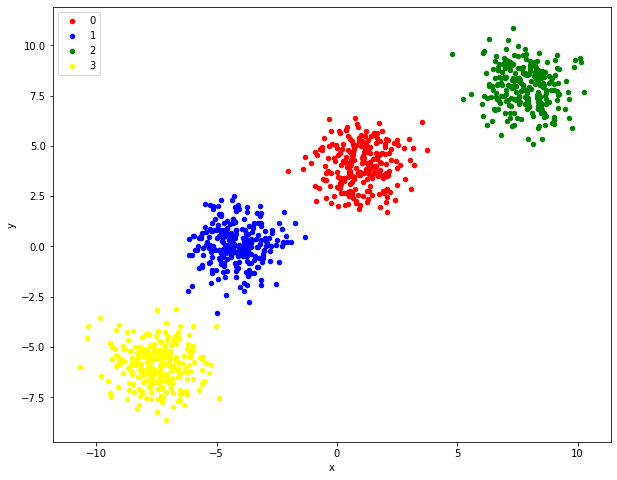

In [142]:
df = DataFrame(dict(x=X_test[:,0], y=X_test[:,1], label=y_pred))
colors = {0:'red', 1:'blue', 2:'green', 3:'yellow'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# pyplot.show()